<a href="https://colab.research.google.com/github/MarouaHY/LP_detection/blob/main/graphics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

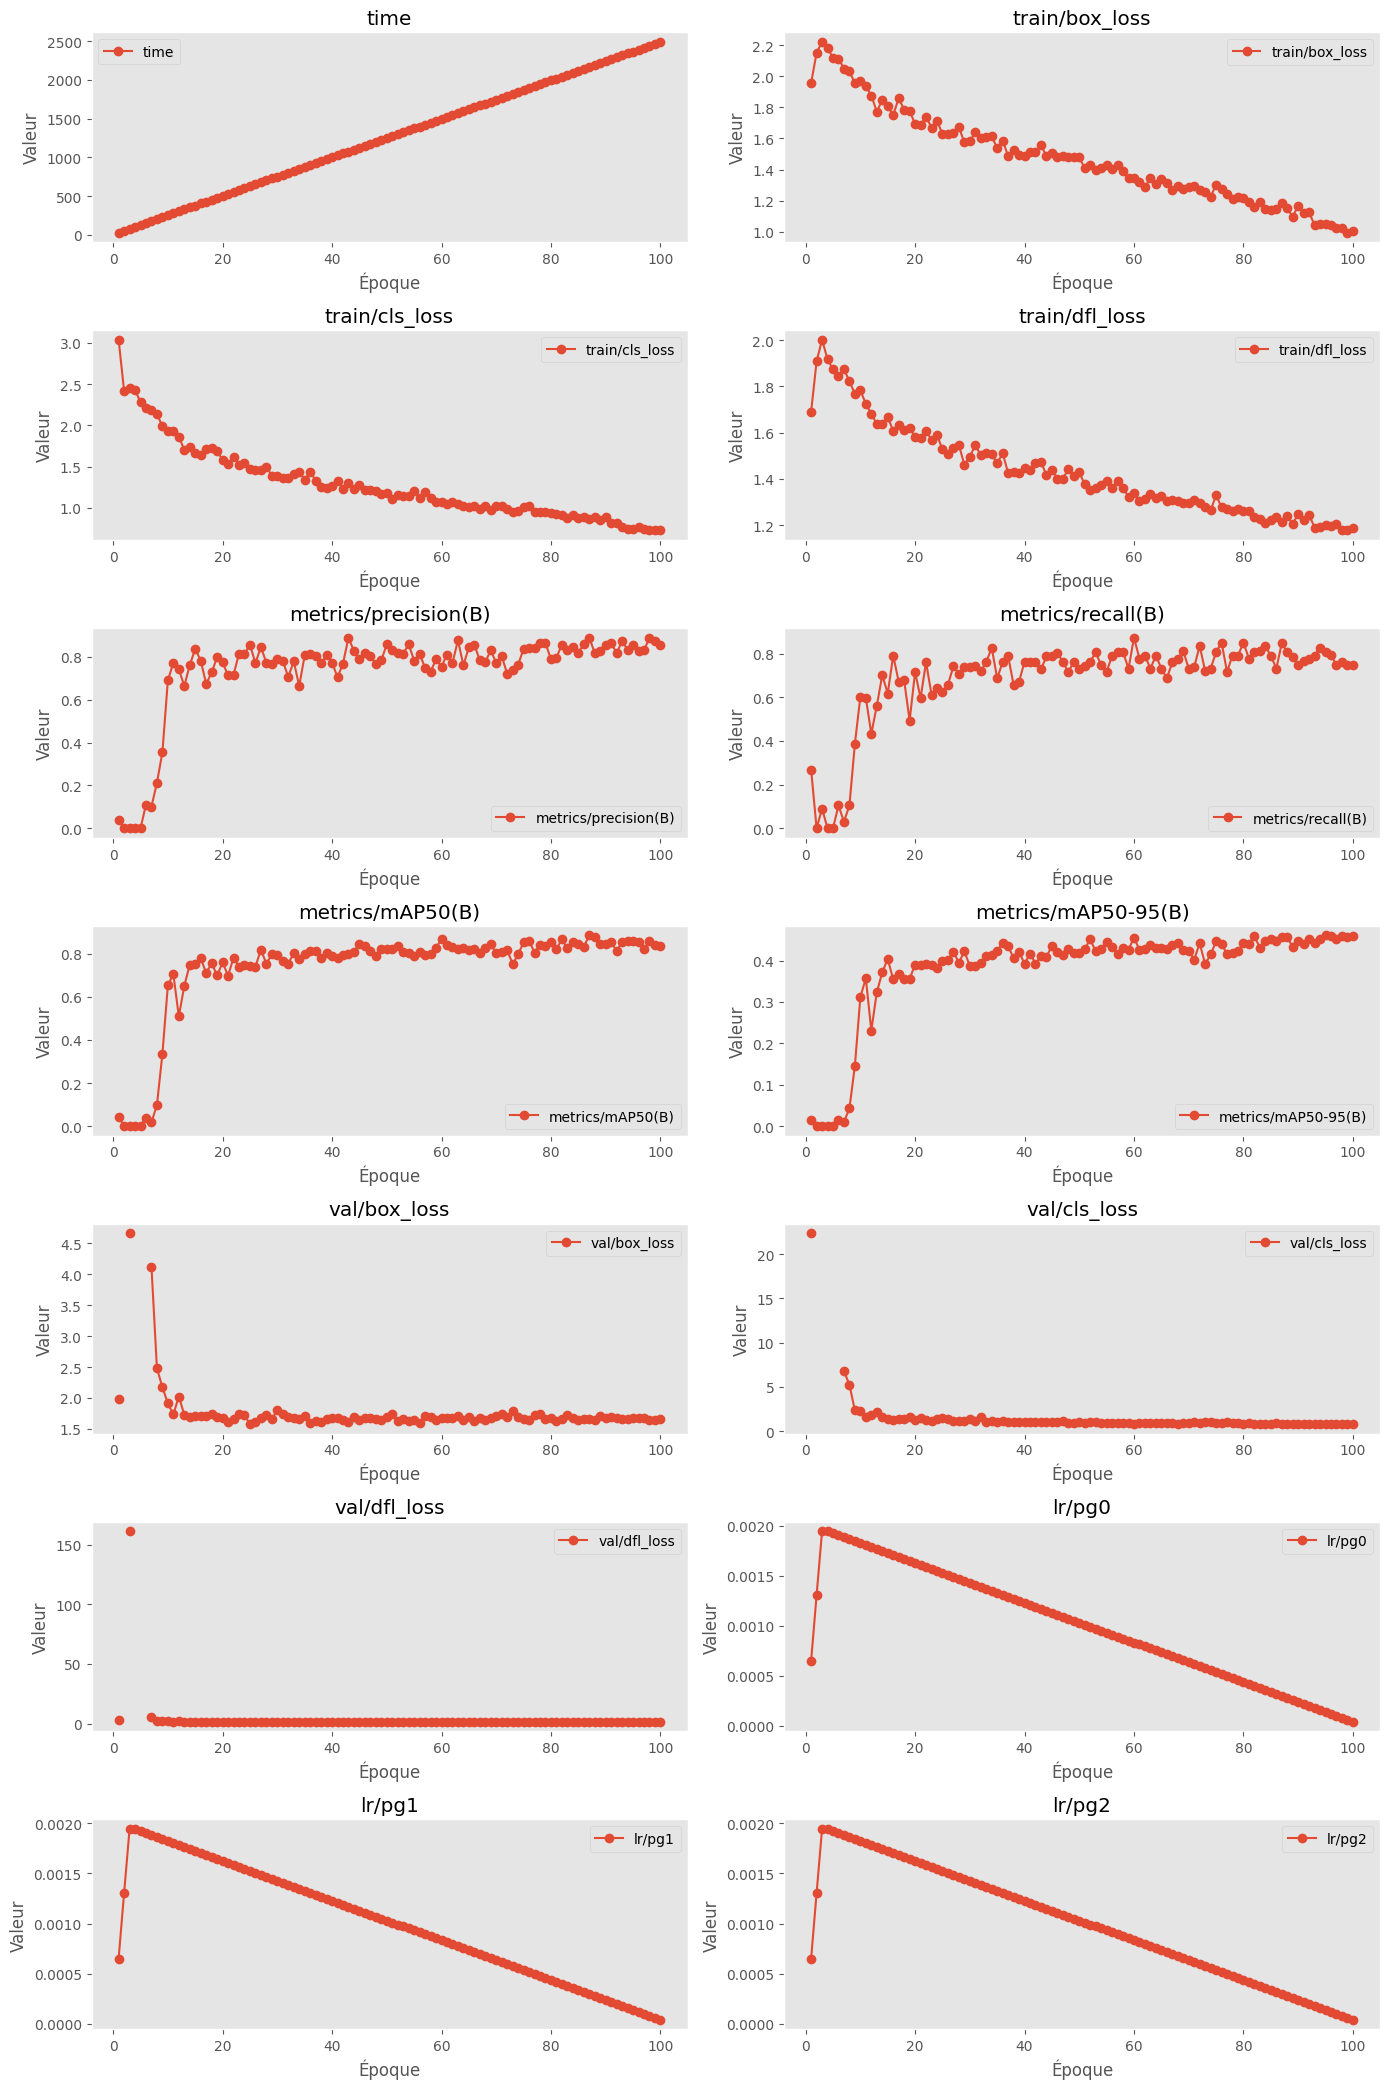

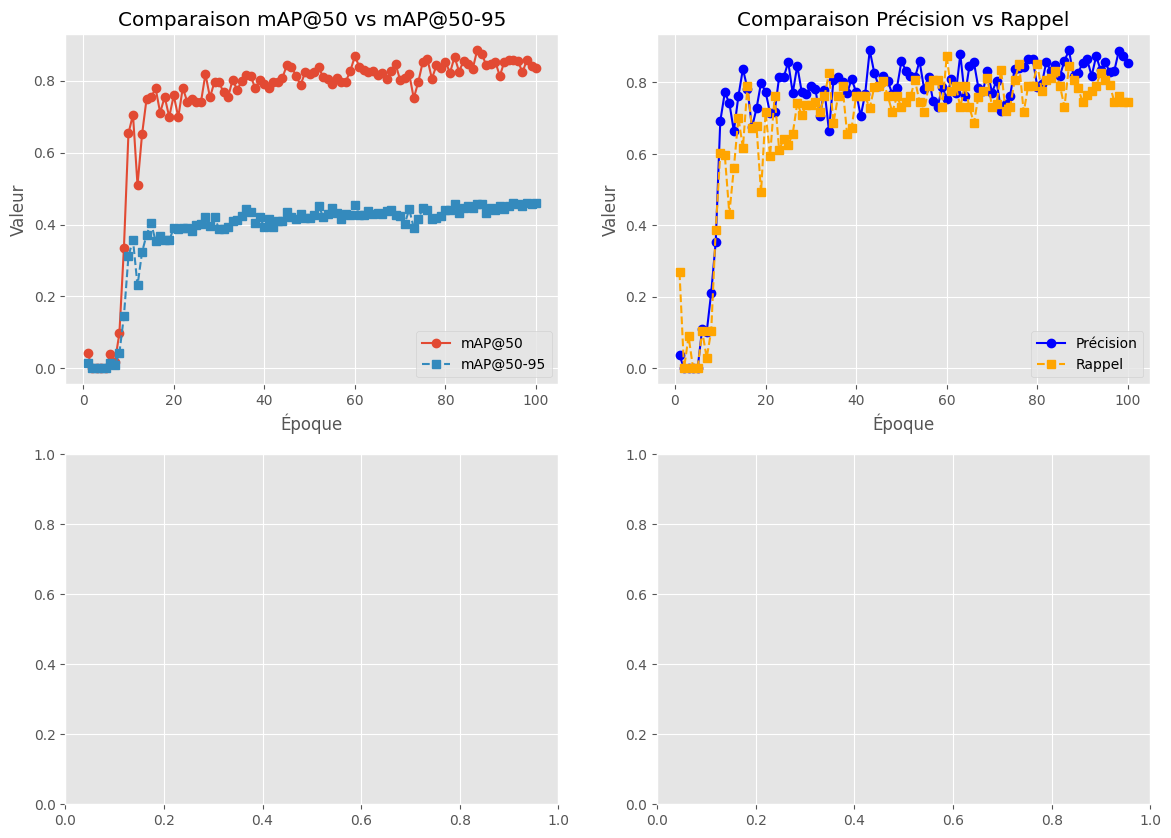

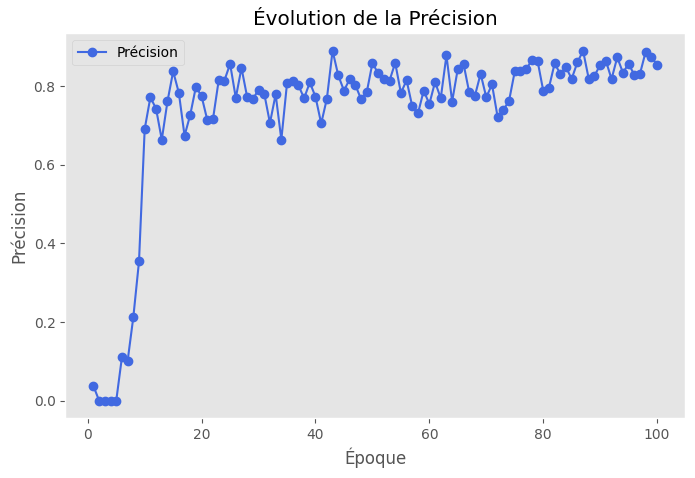

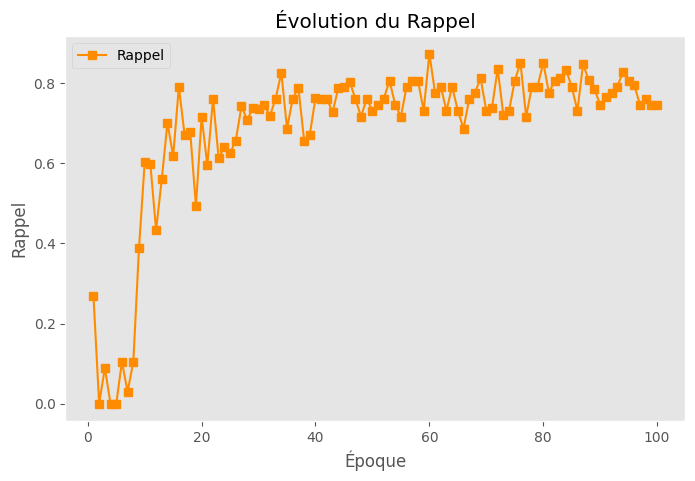

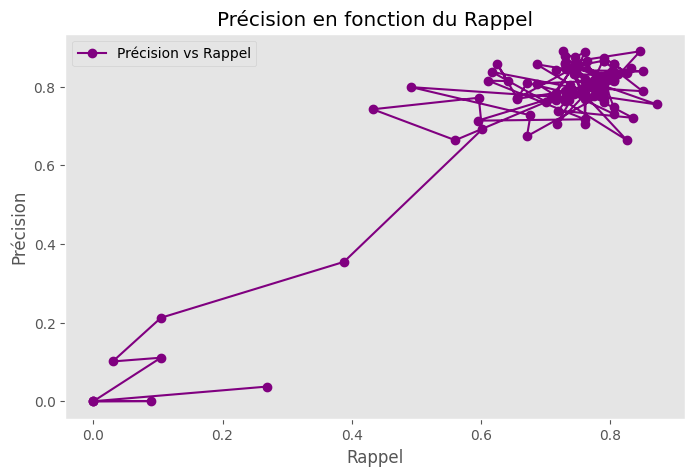

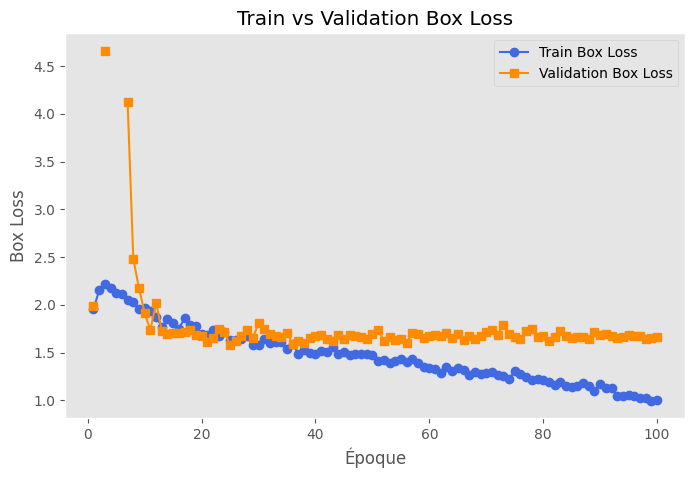

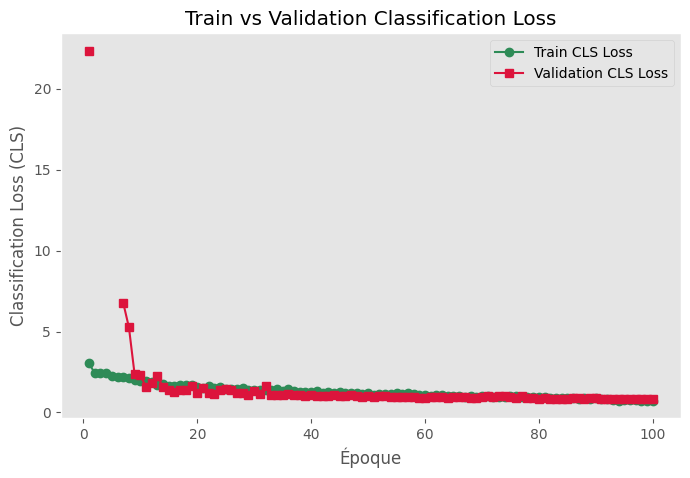

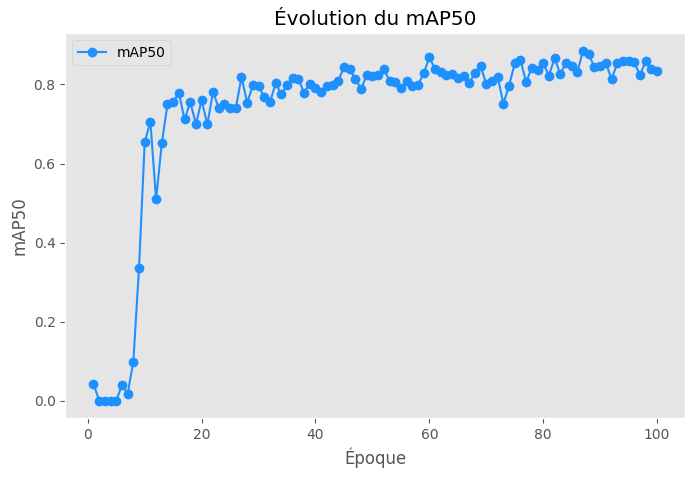

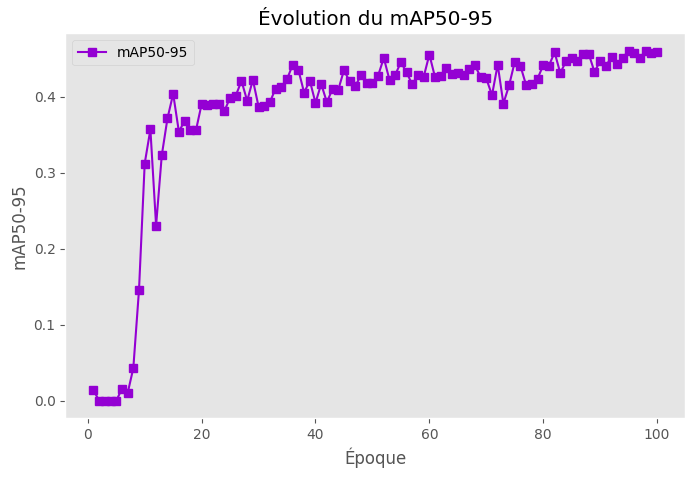

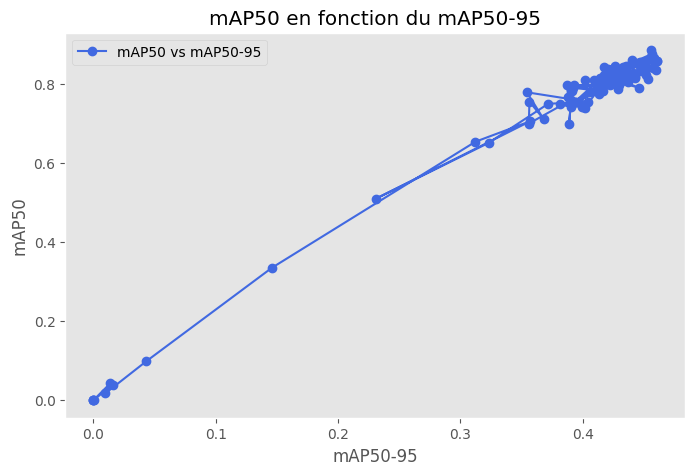

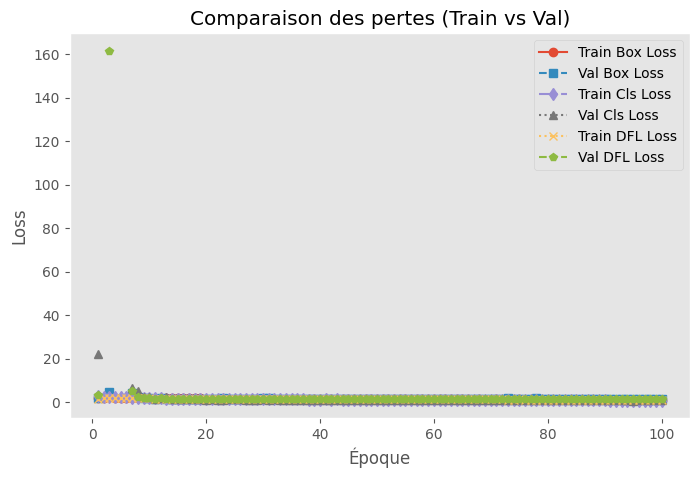

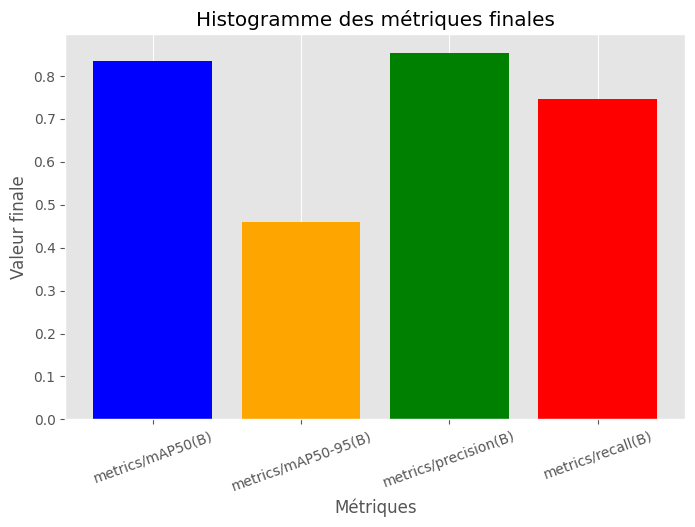

<Figure size 640x480 with 0 Axes>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV (ajuste le chemin si nécessaire)
df = pd.read_csv("/content/results (1).csv")

# Définition des styles des graphes
plt.style.use("ggplot")  # Ou supprime cette ligne si le problème persiste


# 1️⃣ **Tracer un graphe pour chaque métrique individuellement**
num_cols = len(df.columns) - 1  # Exclure la colonne 'epoch'
fig, axes = plt.subplots(nrows=num_cols//2 + num_cols%2, ncols=2, figsize=(14, num_cols * 1.5))
axes = axes.flatten()

for i, col in enumerate(df.columns[1:]):  # Exclure 'epoch'
    axes[i].plot(df["epoch"], df[col], marker="o", linestyle="-", label=col)
    axes[i].set_title(col)
    axes[i].set_xlabel("Époque")
    axes[i].set_ylabel("Valeur")
    axes[i].legend()
    axes[i].grid()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Supprimer les axes vides

plt.tight_layout()
plt.show()

# 2️⃣ **Tracer des graphes combinés pour comparer certaines métriques**
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# mAP50 vs mAP50-95
axs[0, 0].plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@50", linestyle="-", marker="o")
axs[0, 0].plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@50-95", linestyle="--", marker="s")
axs[0, 0].set_title("Comparaison mAP@50 vs mAP@50-95")
axs[0, 0].set_xlabel("Époque")
axs[0, 0].set_ylabel("Valeur")
axs[0, 0].legend()

# Précision vs Rappel
axs[0, 1].plot(df["epoch"], df["metrics/precision(B)"], label="Précision", linestyle="-", marker="o", color="blue")
axs[0, 1].plot(df["epoch"], df["metrics/recall(B)"], label="Rappel", linestyle="--", marker="s", color="orange")
axs[0, 1].set_title("Comparaison Précision vs Rappel")
axs[0, 1].set_xlabel("Époque")
axs[0, 1].set_ylabel("Valeur")
axs[0, 1].legend()


# 📌 Graphe de la Précision seule
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["metrics/precision(B)"], color="royalblue", linestyle="-", marker="o", label="Précision")
plt.xlabel("Époque")
plt.ylabel("Précision")
plt.title("Évolution de la Précision")
plt.grid()
plt.legend()
plt.show()

# 📌 Graphe du Rappel seul
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["metrics/recall(B)"], color="darkorange", linestyle="-", marker="s", label="Rappel")
plt.xlabel("Époque")
plt.ylabel("Rappel")
plt.title("Évolution du Rappel")
plt.grid()
plt.legend()
plt.show()

# 📌 Graphe de la Précision en fonction du Rappel
plt.figure(figsize=(8, 5))
plt.plot(df["metrics/recall(B)"], df["metrics/precision(B)"], color="purple", linestyle="-", marker="o", label="Précision vs Rappel")
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Précision en fonction du Rappel")
plt.grid()
plt.legend()
plt.show()

# 📌 Graphe Train vs Validation Box Loss
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["train/box_loss"], color="royalblue", linestyle="-", marker="o", label="Train Box Loss")
plt.plot(df["epoch"], df["val/box_loss"], color="darkorange", linestyle="-", marker="s", label="Validation Box Loss")
plt.xlabel("Époque")
plt.ylabel("Box Loss")
plt.title("Train vs Validation Box Loss")
plt.grid()
plt.legend()
plt.show()

# 📌 Graphe Train vs Validation Classification Loss (cls)
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["train/cls_loss"], color="seagreen", linestyle="-", marker="o", label="Train CLS Loss")
plt.plot(df["epoch"], df["val/cls_loss"], color="crimson", linestyle="-", marker="s", label="Validation CLS Loss")
plt.xlabel("Époque")
plt.ylabel("Classification Loss (CLS)")
plt.title("Train vs Validation Classification Loss")
plt.grid()
plt.legend()
plt.show()

# 📌 Graphe du mAP50 seul
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"], color="dodgerblue", linestyle="-", marker="o", label="mAP50")
plt.xlabel("Époque")
plt.ylabel("mAP50")
plt.title("Évolution du mAP50")
plt.grid()
plt.legend()
plt.show()

# 📌 Graphe du mAP50-95 seul
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], color="darkviolet", linestyle="-", marker="s", label="mAP50-95")
plt.xlabel("Époque")
plt.ylabel("mAP50-95")
plt.title("Évolution du mAP50-95")
plt.grid()
plt.legend()
plt.show()

# 📌 Graphe mAP50 en fonction du mAP50-95
plt.figure(figsize=(8, 5))
plt.plot(df["metrics/mAP50-95(B)"], df["metrics/mAP50(B)"], color="royalblue", linestyle="-", marker="o", label="mAP50 vs mAP50-95")
plt.xlabel("mAP50-95")
plt.ylabel("mAP50")
plt.title("mAP50 en fonction du mAP50-95")
plt.grid()
plt.legend()
plt.show()



# 📌 2️⃣ Comparaison des pertes Train vs Validation
plt.figure(figsize=(8, 5))
plt.plot(df["epoch"], df["train/box_loss"], label="Train Box Loss", linestyle="-", marker="o")
plt.plot(df["epoch"], df["val/box_loss"], label="Val Box Loss", linestyle="--", marker="s")
plt.plot(df["epoch"], df["train/cls_loss"], label="Train Cls Loss", linestyle="-.", marker="d")
plt.plot(df["epoch"], df["val/cls_loss"], label="Val Cls Loss", linestyle=":", marker="^")
plt.plot(df["epoch"], df["train/dfl_loss"], label="Train DFL Loss", linestyle="dotted", marker="x")
plt.plot(df["epoch"], df["val/dfl_loss"], label="Val DFL Loss", linestyle="dashed", marker="p")
plt.xlabel("Époque")
plt.ylabel("Loss")
plt.title("Comparaison des pertes (Train vs Val)")
plt.legend()
plt.grid()
plt.show()

# 📌 3️⃣ Histogramme des valeurs finales des métriques
plt.figure(figsize=(8, 5))
final_metrics = ["metrics/mAP50(B)", "metrics/mAP50-95(B)", "metrics/precision(B)", "metrics/recall(B)"]
final_values = [df[col].iloc[-1] for col in final_metrics]
plt.bar(final_metrics, final_values, color=["blue", "orange", "green", "red"])
plt.xlabel("Métriques")
plt.ylabel("Valeur finale")
plt.title("Histogramme des métriques finales")
plt.xticks(rotation=20)
plt.grid(axis="y")
plt.show()

plt.tight_layout()
plt.show()
